In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import warnings

filepath = '/Users/michaelmanookin/Documents/Data/rawdata/MEA_Data/analysis/tests_20220712C_yass.p'

with open(filepath, 'rb') as file:
    mdic = pickle.load(file)

In [12]:
mdic.keys()
sta = mdic['sta']
cluster_id = mdic['cluster_id']
spike_count = mdic['spike_count']
frames = mdic['frames']
binned_spikes = mdic['binned_spikes']
generator = mdic['generator']
cell_ids = mdic['cell_ids']
# sta.shape
idx = np.isin(cluster_id, cell_ids)
gen = generator[idx,:].copy()

432.0
[ 9998  1167  6215 ...  9021 10809  4084]


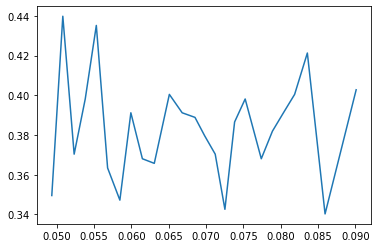

In [32]:
def bin_nonlinearity_count(prediction, response, num_bins=25, order='descend'):
    if order == 'descend':
        inds = np.argsort(-prediction)
    else:
        inds = np.argsort(prediction)
    x_sort = prediction[inds]
    y_sort = response[inds]
    vals_per_bin = np.floor(len(x_sort) / num_bins).astype(int)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        x_bin = np.mean(np.reshape(x_sort[:num_bins*vals_per_bin], (num_bins, vals_per_bin)).T, axis=0)
        y_bin = np.mean(np.reshape(y_sort[:num_bins*vals_per_bin], (num_bins, vals_per_bin)).T, axis=0)
    return x_bin, y_bin

def bin_nonlinearity_hist(prediction, response, num_bins=25):
    edges = np.histogram_bin_edges(prediction, bins=num_bins)
    x_bin = np.zeros((num_bins,))
    y_bin = np.zeros((num_bins,))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        for b in range(num_bins):
            inds = np.argwhere(np.logical_and(prediction >= edges[b],
                                            prediction < edges[b+1])).flatten()
            x_bin[b] = np.nanmean(prediction[inds])
            y_bin[b] = np.nanmean(response[inds])
    return x_bin, y_bin

def bin_nonlinearities(generator, binned_spikes, num_bins=25, normalize=True):
    """
    Computes nonlinearity for LNP model by relating firing rate and generator signal.

    Parameters:
        generator: matrix of size n_cells, n_frames
        binned_spikes: matrix of size n_cells, n_frames
    Returns:
        tuple mean generator and mean spike counts matrices, each of size 
        num_cells,n_frames
    """
    # Normalize the generator signals by the nonlinearity.
    if normalize:
        generator /= np.std(generator, axis=1, keepdims=True)
    np.zeros((generator.shape[0], num_bins))
    x_bin = np.zeros((generator.shape[0], num_bins))
    y_bin = np.zeros((generator.shape[0], num_bins))
    for i in range(generator.shape[0]):
        if np.all(np.isfinite(generator[i,:])):
            x_bin[i,:], y_bin[i,:] = bin_nonlinearity_hist(generator[i,:], binned_spikes[i,:], num_bins=num_bins)
    return x_bin, y_bin


In [35]:
num_bins=25

X,Y = bin_nonlinearities(gen, binned_spikes=binned_spikes.T, num_bins=num_bins)

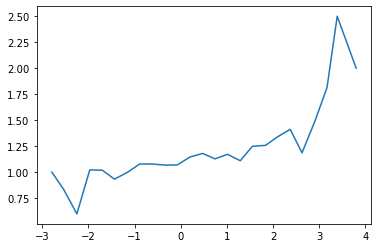

In [41]:
i = 6

plt.plot(X[i,:], Y[i,:])
plt.show()